In [ ]:
# Shear Correlation Functions using TreeCorr

In [2]:
# Set coordinates x,y
# We use the SLICS Mock-Source KiDS-450 catalog
# First, we need to import the necessary libraries and change the working directory
from astropy.io import fits
import os
import numpy as np
import treecorr
import fitsio
for g in os.listdir("/home/stamou/Downloads/KiDS450_download_dir"):
    print(g)
os.chdir('/home/stamou/Downloads/KiDS450_download_dir')
os.getcwd()
catalog1=fits.open('GalCatalog_LOS1.fits')[1].data
catalog1
# We save the x and y coordinates as separate arrays and we import them as follows:
x_list=[[catalog1[i][0]] for i in range(3070801)]
y_list=[[catalog1[i][1]] for i in range(3070801)]

.ipynb_checkpoints
shear.txt
Untitled.ipynb
ellipticity.txt
GalCatalog_LOS2.fits
TreeCorr
shear_list.txt
eobs_list.txt
cat1.ipynb
polarization.txt
gg.out
gg2.out
GalCatalog_LOS1.fits
polarisation.txt


In [3]:
# We want to compute the usual correlation function. 
#Load the data from the catalogue
shearfull=np.loadtxt('shear_list.txt')
eobsfull=np.loadtxt('eobs_list.txt') 
shear1=[shearfull[i][0] for i in range(3070801)]
shear2=[shearfull[i][1] for i in range(3070801)]
eobs1=[eobsfull[i][0] for i in range(3070801)]
eobs2=[eobsfull[i][1] for i in range(3070801)]
eint1=[eobs1[i]-shear1[i] for i in range(3070801)]
eint2=[eobs2[i]-shear2[i] for i in range(3070801)]

In [4]:
# We start from the usual estimator
mycat1=treecorr.Catalog(x=x_list, y=y_list, g1=shear1, g2=shear2, x_units='arcmin', y_units='arcmin')
corrf1=treecorr.GGCorrelation(min_sep=1., max_sep=100, bin_size=0.1, sep_units='arcmin')
corrf1.process(mycat1)

         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)


In [5]:
# Define the separation
r=np.exp(corrf1.meanlogr)
xips=corrf1.xip
xims=corrf1.xim

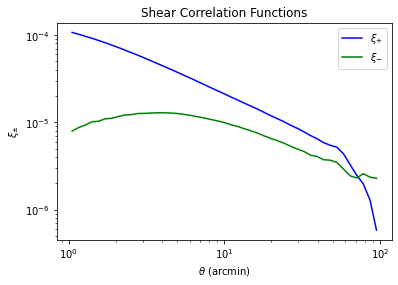

In [13]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(r, xips, color='blue', label=r'$\xi_{+}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xims, color='green',label=r'$\xi_{-}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel(r'$\xi_{\pm}$')
plt.title('Shear Correlation Functions')
plt.legend()
plt.show()